In [6]:
import pandas as pd
import numpy as np
import statsmodels.api
import matplotlib as plt
import matplotlib.pyplot
from sklearn.preprocessing import OneHotEncoder

In [1]:
# data read
raw_train = pd.read_csv("~/hosthome/fc_team_project2/datasets/UJIIndoorLoc/trainingData.csv")
raw_validation = pd.read_csv("~/hosthome/fc_team_project2/datasets/UJIIndoorLoc/validationData.csv")

In [24]:
raw_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7515.917,4864889.663,1,1,0,0,0,0,1380872703
1,100,100,100,100,100,100,100,100,100,100,...,100,-7383.867,4864839.740,4,2,0,0,0,13,1381155054
2,100,100,100,100,100,100,100,100,100,100,...,100,-7374.302,4864846.534,4,2,0,0,0,13,1381155095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7365.825,4864842.829,4,2,0,0,0,13,1381155138
4,100,100,100,100,100,100,100,100,100,100,...,100,-7641.499,4864922.399,2,0,0,0,0,2,1380877774
5,100,100,100,100,100,100,100,100,100,100,...,100,-7338.807,4864825.467,2,2,0,0,0,12,1380874853
6,100,100,100,100,100,100,100,100,100,100,...,100,-7379.352,4864849.201,3,2,0,0,0,20,1380874982
7,100,100,100,100,100,100,100,100,100,100,...,100,-7340.559,4864758.919,3,2,0,0,0,21,1380875085
8,100,100,100,100,100,100,100,100,100,100,...,100,-7357.531,4864765.848,2,2,0,0,0,12,1380875092
9,100,100,100,100,100,100,100,100,100,100,...,100,-7345.085,4864830.817,0,2,0,0,0,20,1380875118


In [68]:
raw_validation.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.264,4864920.778,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.621,4864934.225,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.152,4864949.532,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.570,4864934.093,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.144,4864982.217,0,0,122,2,11,13,1369909710


---

In [ ]:
# normalization_1
nor_train = (raw_train.iloc[:, 0:520]-1)/(-105)
nor_train[nor_train == -0.9428571428571428] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = (raw_validation.iloc[:, 0:520]-1)/(-105)
nor_validation[nor_validation == -0.9428571428571428] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

In [2]:
# normalization_2
nor_train = raw_train.iloc[:, 0:520]/(-104)
nor_train[nor_train == -0.9615384615384616] = 0
nor_train = nor_train.join(raw_train.iloc[:, 520:])

nor_validation = raw_validation.iloc[:, 0:520]/(-104)
nor_validation[nor_validation == -0.9615384615384616] = 0
nor_validation = nor_validation.join(raw_validation.iloc[:, 520:])

---

In [4]:
# set display option
pd.set_option('display.float_format', lambda x: '%.3f' % x)

---

In [19]:
# one-hot-encoding train, test data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(dtype=int)

train_c = raw_train.loc[:, ("FLOOR", "BUILDINGID")].values
train_c_e = ohe.fit(train_c)
train_c = train_c_e.transform(train_c).toarray()
train_c = pd.DataFrame(train_c)

validation_c = raw_validation.loc[:, ("FLOOR", "BUILDINGID")].values
validation_c = train_c_e.transform(validation_c).toarray()
validation_c = pd.DataFrame(validation_c)

---

In [4]:
# one-hot-encoding train, test data(FLOOR)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

train_f = raw_train["FLOOR"].values
train_f = train_f.reshape(19937, 1)
train_f_c = ohe.fit(train_f)
train_f = train_f_c.transform(train_f).toarray()
train_f = pd.DataFrame(train_f, columns=["f_1", "f_2", "f_3", "f_4", "f_5"])
train_f["f_1"] = train_f["f_1"].astype(int)
train_f["f_2"] = train_f["f_2"].astype(int)
train_f["f_3"] = train_f["f_3"].astype(int)
train_f["f_4"] = train_f["f_4"].astype(int)
train_f["f_5"] = train_f["f_5"].astype(int)

validation_f = raw_validation["FLOOR"].values
validation_f = validation_f.reshape(1111, 1)
validation_f = train_f_c.transform(validation_f).toarray()
validation_f = pd.DataFrame(validation_f, columns=["f_1", "f_2", "f_3", "f_4", "f_5"])
validation_f["f_1"] = validation_f["f_1"].astype(int)
validation_f["f_2"] = validation_f["f_2"].astype(int)
validation_f["f_3"] = validation_f["f_3"].astype(int)
validation_f["f_4"] = validation_f["f_4"].astype(int)
validation_f["f_5"] = validation_f["f_5"].astype(int)

In [5]:
# one-hot-encoding train, test data(BUILDINGID)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

train_b = raw_train["BUILDINGID"].values
train_b = train_b.reshape(19937, 1)
train_b_c = ohe.fit(train_b)
train_b = train_b_c.transform(train_b).toarray()
train_b = pd.DataFrame(train_b, columns=["b_1", "b_2", "b_3"])
train_b["b_1"] = train_b["b_1"].astype(int)
train_b["b_2"] = train_b["b_2"].astype(int)
train_b["b_3"] = train_b["b_3"].astype(int)

validation_b = raw_validation["BUILDINGID"].values
validation_b = validation_b.reshape(1111, 1)
validation_b = train_b_c.transform(validation_b).toarray()
validation_b = pd.DataFrame(validation_b, columns=["b_1", "b_2", "b_3"])
validation_b["b_1"] = validation_b["b_1"].astype(int)
validation_b["b_2"] = validation_b["b_2"].astype(int)
validation_b["b_3"] = validation_b["b_3"].astype(int)

In [6]:
# one-hot-encoding train, test data(PHONEID)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

train_p = raw_train["PHONEID"].values
train_p = train_p.reshape(19937 , 1)
train_p_c = ohe.fit(train_p)
train_p = train_p_c.transform(train_p).toarray()
train_p = pd.DataFrame(train_p, columns=["p_1", "p_2", "p_3", "p_4", "p_5", "p_6", "p_7", "p_8", "p_9", "p_10", "p_11", "p_12", "p_13", "p_14", "p_15", "p_16"])
train_p = train_p[:].astype(int)

validation_p = raw_validation["PHONEID"].values
validation_p = validation_p.reshape(1111 , 1)
validation_p = train_p_c.transform(validation_p).toarray()
validation_p = pd.DataFrame(validation_p, columns=["p_1", "p_2", "p_3", "p_4", "p_5", "p_6", "p_7", "p_8", "p_9", "p_10", "p_11", "p_12", "p_13", "p_14", "p_15", "p_16"])
validation_p = validation_p[:].astype(int)

---

In [20]:
# train_1
##train_y = nor_train["LONGITUDE"]
train_y = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
train_x = nor_train.iloc[:, 0:520]
train_x = train_x.join(train_c)
##train_x = sm.add_constant(train_x)

model_1 = sm.OLS(train_y, train_x).fit()


In [48]:
# train_2
##train_y = nor_train["LONGITUDE"]
train_y = nor_train.loc[:, ("LONGITUDE", "LATITUDE")]
train_x = nor_train.iloc[:, 0:520]
train_x = train_x.join(train_f)
train_x = train_x.join(train_b)
##train_x = train_x.join(train_p)
##train_x = sm.add_constant(train_x)

model_2 = sm.OLS(train_y, train_x).fit()


In [21]:
# test_1
validation_x = nor_validation.iloc[:, 0:520]
validation_x = validation_x.join(validation_c)
##validation_x = sm.add_constant(validation_x)

validation_y = model_1.predict(validation_x)
validation_y.head()

,0,1
0,-7477.431,4864883.582
1,-7363.466,4864843.200
2,-7367.806,4864840.213
3,-7354.912,4864841.143
4,-7635.898,4864923.465


In [49]:
# test_2
validation_x = nor_validation.iloc[:, 0:520]
validation_x = validation_x.join(validation_f)
validation_x = validation_x.join(validation_b)
##validation_x = validation_x.join(validation_p)
##validation_x = sm.add_constant(validation_x)

validation_y = model_2.predict(validation_x)
validation_y.head()

,0,1
0,-7477.432,4864883.602
1,-7363.459,4864843.234
2,-7367.809,4864840.270
3,-7354.857,4864841.150
4,-7635.965,4864923.452


In [9]:
raw_validation.loc[:, ("LONGITUDE", "LATITUDE")].head()

,LONGITUDE,LATITUDE
0,-7515.917,4864889.663
1,-7383.867,4864839.740
2,-7374.302,4864846.534
3,-7365.825,4864842.829
4,-7641.499,4864922.399


---

In [18]:
# GAP
validation_y = pd.DataFrame(validation_y)

result = validation_y.join(raw_validation.loc[:, ("LONGITUDE", "LATITUDE")])
result["lONG_Gap"] = raw_validation.loc[:, "LONGITUDE"] - validation_y[0]
result["lAT_Gap"] = raw_validation.loc[:, "LATITUDE"] - validation_y[1]
result

,0,1,LONGITUDE,LATITUDE,lONG_Gap,lAT_Gap
0,-7477.431,4864883.582,-7515.917,4864889.663,-38.486,6.081
1,-7363.466,4864843.200,-7383.867,4864839.740,-20.401,-3.460
2,-7367.806,4864840.213,-7374.302,4864846.534,-6.496,6.320
3,-7354.912,4864841.143,-7365.825,4864842.829,-10.913,1.686
4,-7635.898,4864923.465,-7641.499,4864922.399,-5.602,-1.066
5,-7314.739,4864820.901,-7338.807,4864825.467,-24.068,4.566
6,-7360.964,4864848.042,-7379.352,4864849.201,-18.388,1.160
7,-7363.969,4864778.687,-7340.559,4864758.919,23.410,-19.768
8,-7358.989,4864778.027,-7357.531,4864765.848,1.458,-12.180
9,-7344.168,4864823.774,-7345.085,4864830.817,-0.917,7.044


---

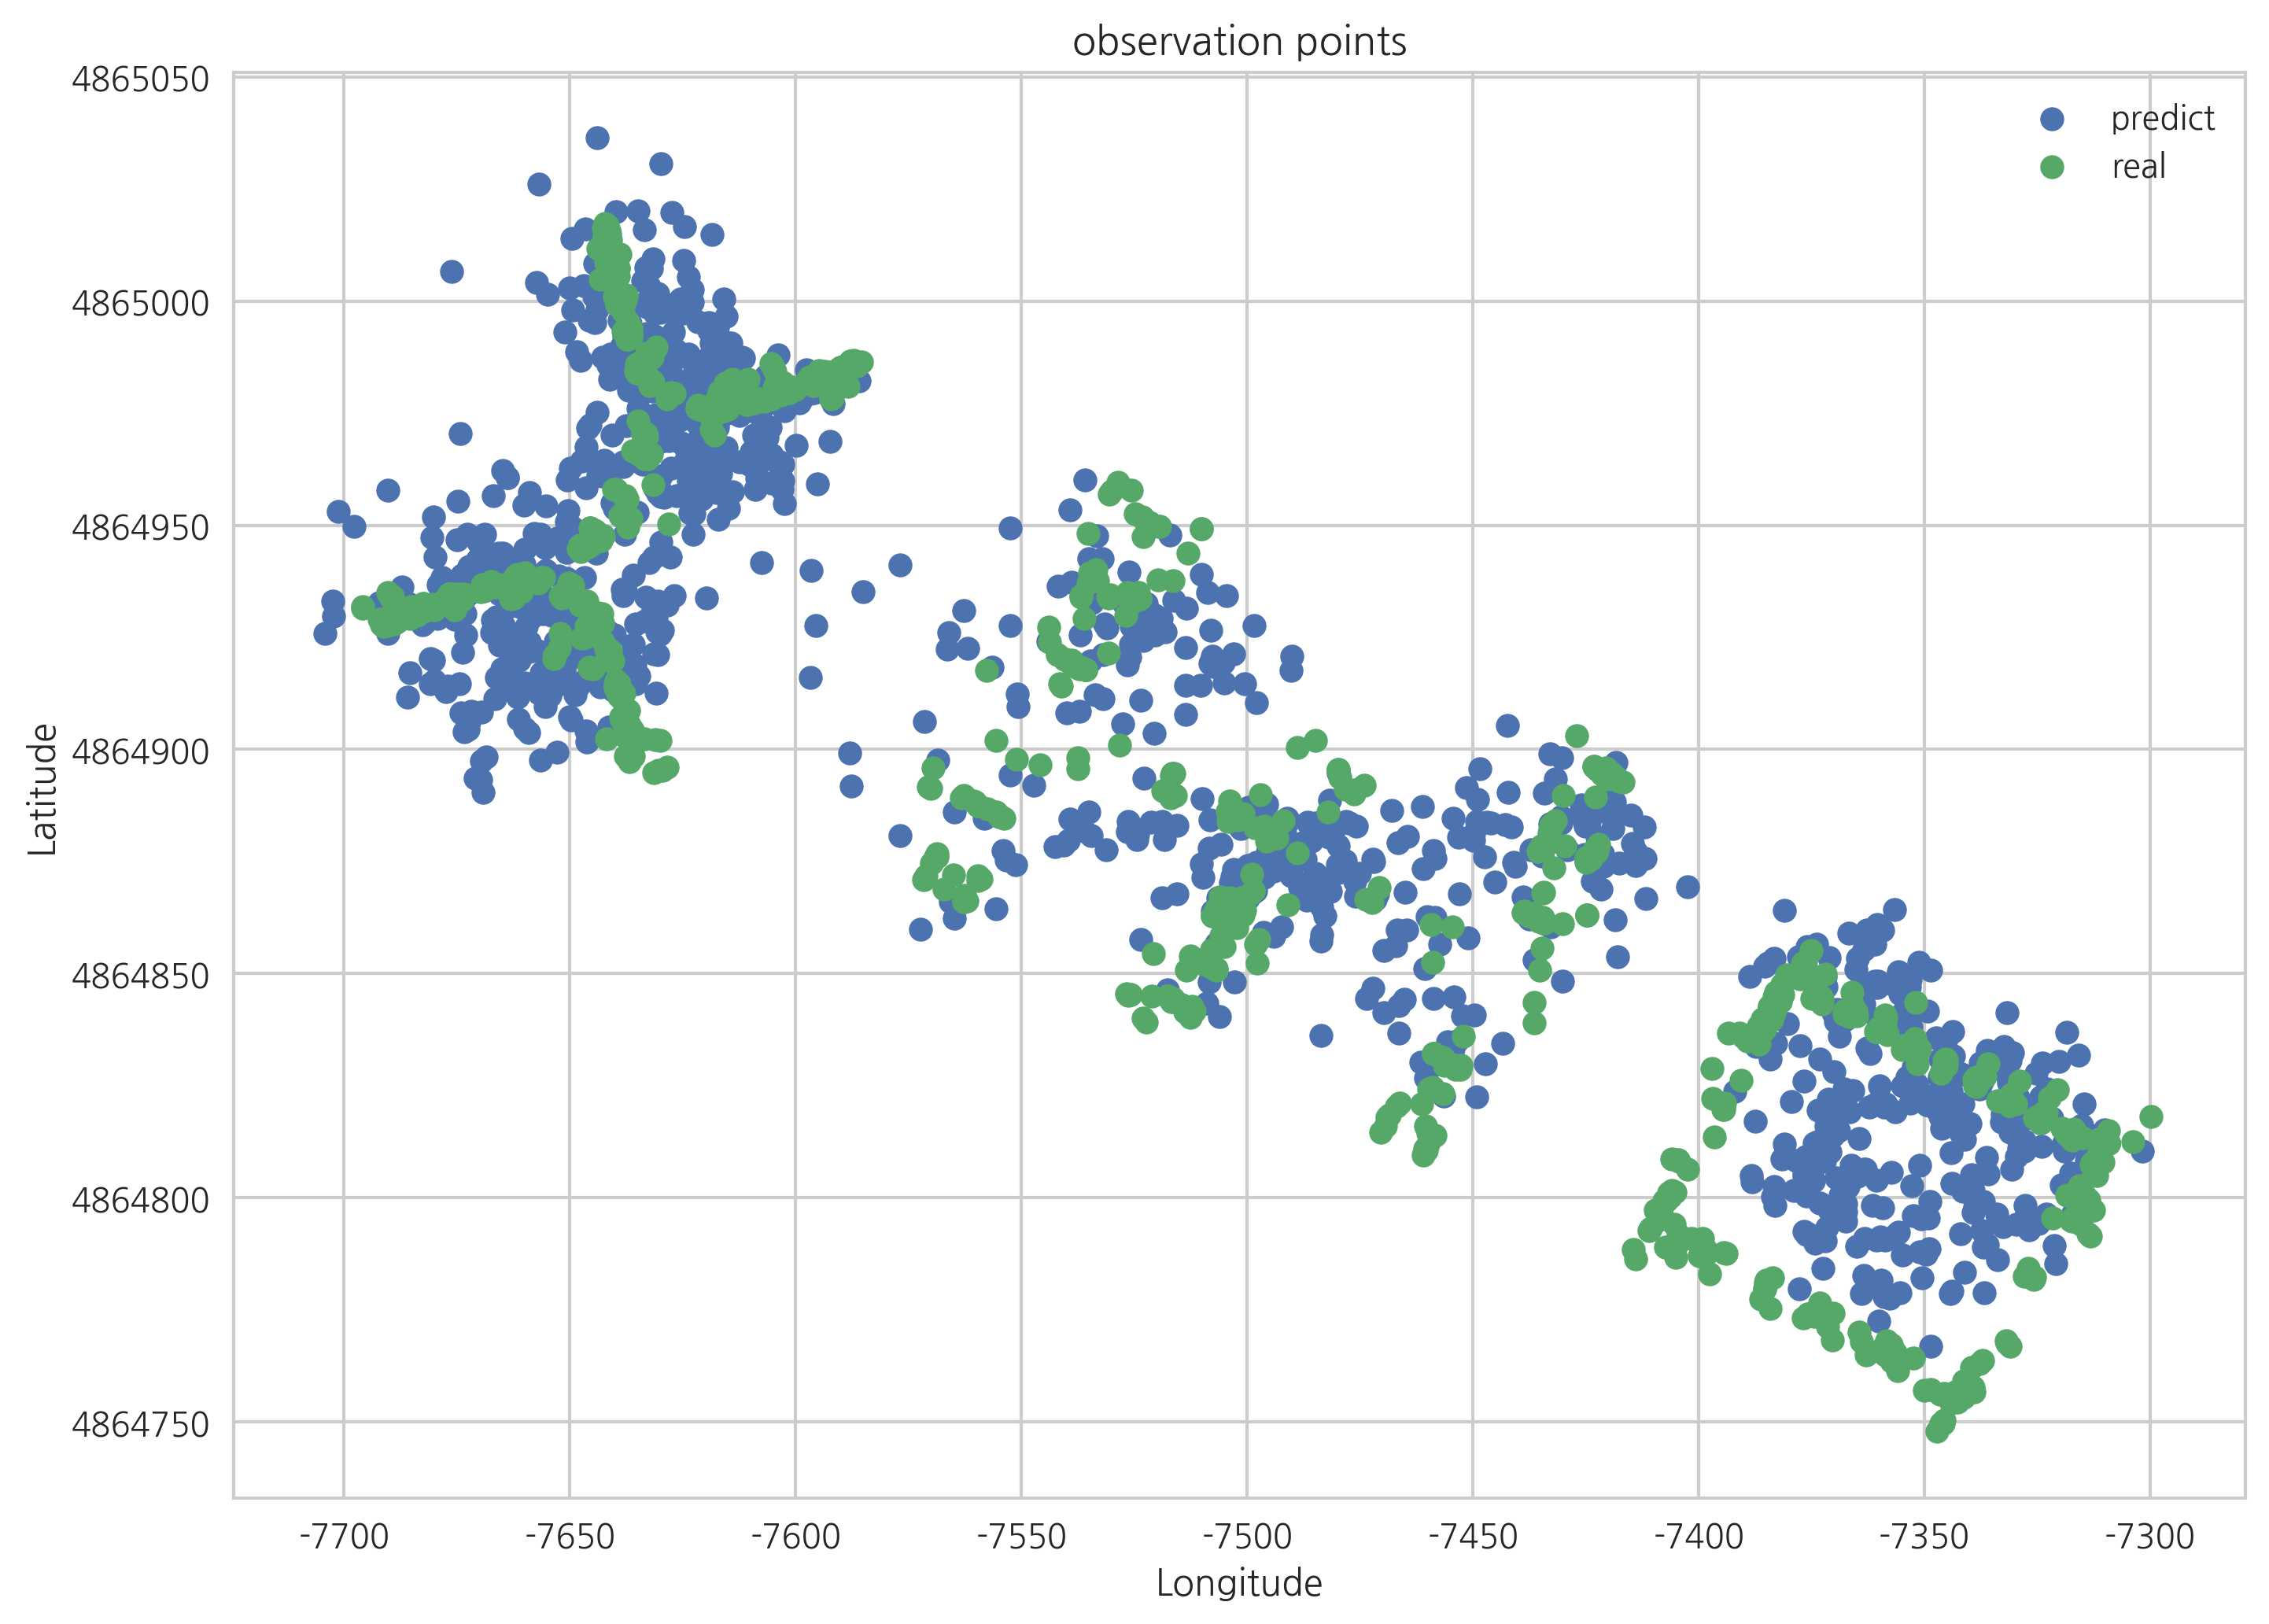

In [12]:
# Visualization
plt.scatter(validation_y[0], validation_y[1], label = "predict")
plt.scatter(raw_validation["LONGITUDE"], raw_validation["LATITUDE"], label = "real")
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("observation points")
plt.ticklabel_format(style = "plain")
plt.show()